# ML PROJECT  HEART STROKE PREDICTION

In [1]:
import pandas as pd
import numpy as np

# LOAD THE DATA

In [2]:
health_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# SHOW THE DATA

In [3]:
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#  Returns the number of rows and columns in the dataset (rows, columns)

In [4]:
health_data.shape

(5110, 12)

# Return the columns

In [5]:
health_data.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Dropping 'id' column as it is not useful for model training


In [6]:
health_data.drop(['id'],axis=1,inplace=True)

# Return the rows and columns

In [7]:
health_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Check if any value is null

In [8]:
health_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# find mean value for BMI column 

In [9]:
health_data['bmi'].mean()

28.893236911794666

#  Filling missing BMI values with the mean


In [10]:
health_data['bmi']=health_data['bmi'].fillna(health_data['bmi'].mean())

# Check if any value is null After filling

In [11]:
health_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Identify categorical columns

In [12]:
cat_columns = health_data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

# Import required libraries

In [13]:
import matplotlib.pyplot as plt

# Visualize Categorical columns

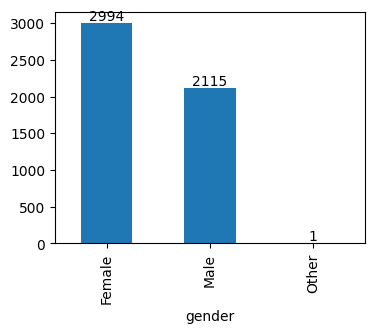

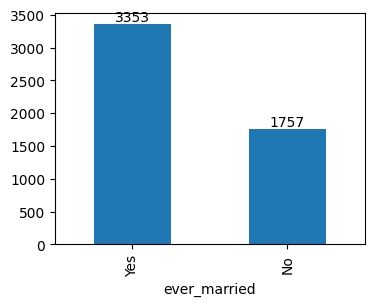

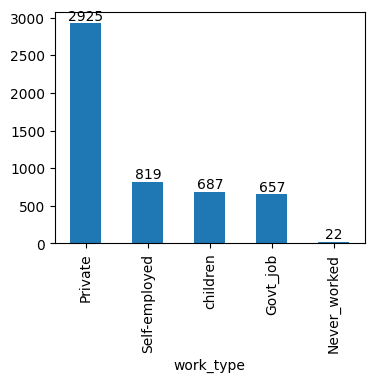

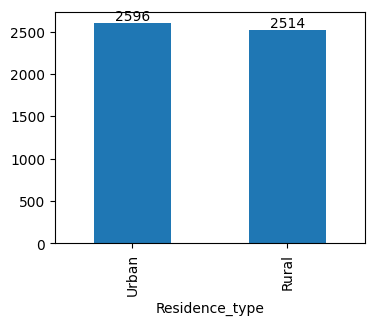

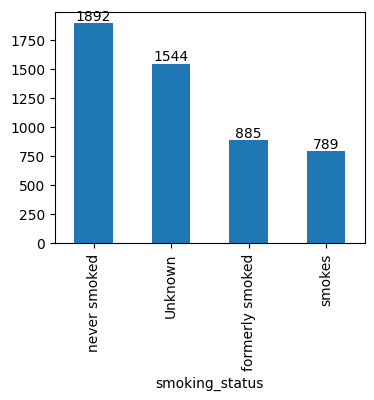

In [14]:
for col in cat_columns:
    plt.figure(figsize=(4,3))
    axes = health_data[col].value_counts().plot(kind ='bar')
    for i in axes.containers:
        axes.bar_label(i)
    plt.show()

In [15]:
Num_cols = ['age','avg_glucose_level','bmi']

# Visualize Numerical Columns

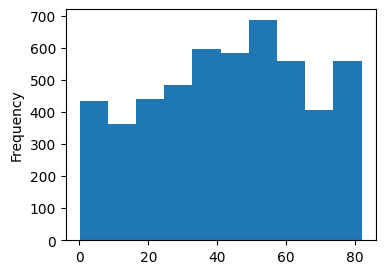

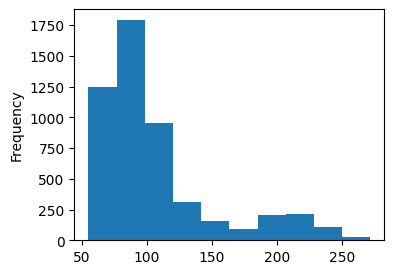

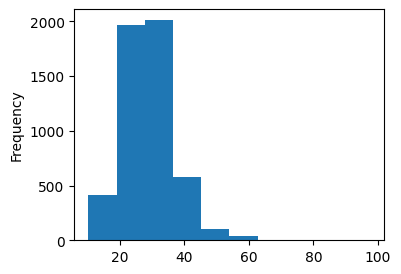

In [16]:
for col in Num_cols:
    plt.figure(figsize=(4,3))
    health_data[col].plot(kind = 'hist')
    for i in axes.containers:
        axes.bar_label(i)
    plt.show()

# Return Rows and columns

In [17]:
health_data.shape

(5110, 11)

#  Displays the count of occurrences for each class 

In [18]:
health_data.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

# Return the rows and column of 1 class

In [19]:
stroke_df=health_data[health_data['stroke']== 1]
stroke_df.shape

(249, 11)

# Return the rows and column of 0 class

In [20]:
no_stroke_df = health_data[health_data['stroke']== 0]
no_stroke_df.shape

(4861, 11)

# Label Encoding for Categorical Columns

In [21]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
encoder = LabelEncoder()

for col in cat_columns:
    health_data[col] = encoder.fit_transform(health_data[col])
    
# Check the data after encoding
health_data.head(50)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


# Splitting the Data into Features (X) and Target (y)

In [22]:
# Defining X (features) and y (target)
X = health_data.drop(columns=['stroke'])
y = health_data['stroke']


# Hold Out Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# SMOTE for Balancing the Data

In [24]:
from imblearn.over_sampling import SMOTE  #Synthetic Minority Over Sampling Technique
# Checking class distribution after resampling
from collections import Counter

# Applying SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Check class distribution in the training set
print("Original class distribution in training data:", Counter(y_train))


print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_resampled))


Original class distribution in training data: Counter({0: 3417, 1: 160})
Before SMOTE: Counter({0: 3417, 1: 160})
After SMOTE: Counter({0: 3417, 1: 3417})


# Train Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=42)

# Evaluate the Model Based On Random Forest

In [26]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

# Predict on training and test sets
y_train_pred = rf_model.predict(X_resampled)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print evaluation metrics
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


# Compute the confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Extracting the values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Print position of each category
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Positive (TP): {TP}')

# Precision
precision = precision_score(y_test, y_test_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_test_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')


Training Accuracy: 100.00%
Test Accuracy: 90.28%
Confusion Matrix:
[[1371   73]
 [  76   13]]
True Negative (TN): 1371
False Positive (FP): 73
False Negative (FN): 76
True Positive (TP): 13
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


In [ ]:
# Function to get patient input and return a DataFrame with correct feature names
def get_patient_input():
    gender = input("Enter Gender (Male: 1, Female: 0, Other: 2): ")
    age = input("Enter Age: ")
    hypertension = input("Do you have Hypertension? (Yes: 1, No: 0): ")
    heart_disease = input("Do you have Heart Disease? (Yes: 1, No: 0): ")
    ever_married = input("Are you married? (Yes: 1, No: 0): ")
    work_type = input("Enter Work Type (Private: 2, Self-employed: 3, Govt Job: 1, Never Worked: 0, Children: 4): ")
    Residence_type = input("Enter Residence Type (Urban: 1, Rural: 0): ")
    avg_glucose_level = input("Enter Average Glucose Level: ")
    bmi = input("Enter BMI: ")
    smoking_status = input("Enter Smoking Status (Formerly Smoked: 1, Never Smoked: 2, Smokes: 3, Unknown: 0): ")

    # Create a dictionary of the inputs with the correct feature names
    patient_data = {
        'gender': [float(gender)],
        'age': [float(age)],
        'hypertension': [float(hypertension)],
        'heart_disease': [float(heart_disease)],
        'ever_married': [float(ever_married)],
        'work_type': [float(work_type)],
        'Residence_type': [float(Residence_type)],
        'avg_glucose_level': [float(avg_glucose_level)],
        'bmi': [float(bmi)],
        'smoking_status': [float(smoking_status)]
    }

    # Convert to DataFrame with the correct feature names
    patient_input_df = pd.DataFrame(patient_data)
    
    return patient_input_df

# Get patient input as a DataFrame
patient_input = get_patient_input()

# Make a prediction using the trained model
prediction = rf_model.predict(patient_input)

# Output the prediction
if prediction[0] == 1:
    print("The patient is likely to have a stroke.")
else:
    print("The patient is not likely to have a stroke.")

# Logistic Regression

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_resampled, y_resampled)

# Evaluate the Model Based On Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

# Predict on training and test sets
y_train_pred = log_reg_model.predict(X_resampled)
y_test_pred = log_reg_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print evaluation metrics
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


# Compute the confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)
# Extracting the values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Print position of each category
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Positive (TP): {TP}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

print(f'F1 Score: {f1:.2f}')

